In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    final1: int
    num3: int
    num4: int
    operation2: str
    final2: int

In [3]:
def add_node1(state: AgentState) -> AgentState:
    """Performs addition on num1 and num2 and stores the result in final1."""
    state["final1"] = state["num1"] + state["num2"]
    return state

def sub_node1(state: AgentState) -> AgentState:
    """Performs subtraction on num1 and num2 and stores the result in final1."""
    state["final1"] = state["num1"] - state["num2"]
    return state

def router1(state: AgentState) -> AgentState:
    """Routes to the appropriate node based on the value of operation1."""
    if state["operation1"] == "+":
        return "add_edge1"
    elif state["operation1"] == "-":
        return "sub_edge1"
    else:
        raise ValueError("Invalid operation")

def add_node2(state: AgentState) -> AgentState:
    """Performs addition on num3 and num4 and stores the result in final2."""
    state["final2"] = state["num3"] + state["num4"]
    return state

def sub_node2(state: AgentState) -> AgentState:
    """Performs subtraction on num3 and num4 and stores the result in final2."""
    state["final2"] = state["num3"] - state["num4"]
    return state

def router2(state: AgentState) -> AgentState:
    """Routes to the appropriate node based on the value of operation2."""
    if state["operation2"] == "+":
        return "add_edge2"
    elif state["operation2"] == "-":
        return "sub_edge2"
    else:
        raise ValueError("Invalid operation")

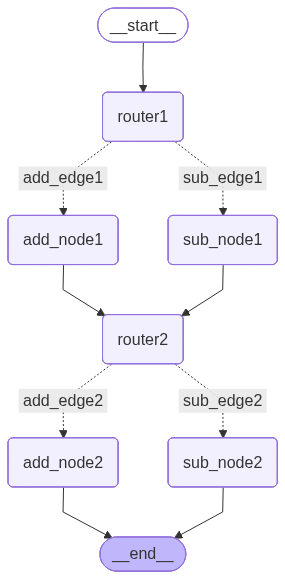

In [4]:
graph = StateGraph(AgentState)
graph.add_node("add_node1", add_node1)
graph.add_node("sub_node1", sub_node1)
graph.add_node("router1", lambda state: state)
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "add_edge1": "add_node1",
        "sub_edge1": "sub_node1"
    }
)
graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")

graph.add_conditional_edges(
    "router2",
    router2,
    {
        "add_edge2": "add_node2",
        "sub_edge2": "sub_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)
app = graph.compile()
app

In [5]:
result = app.invoke({"num1": 10, "num2": 5, "operation1": "+", "num3": 20, "num4": 8, "operation2": "-"})
result["final1"], result["final2"]

(15, 12)